<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/Exponential_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exponential is the continuous form of Geometric Distribution

Geometric is used to model number of trials until first success
Exponential is used to model the waiting time untik first arrival(success)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("m0ntecarl0/engine-time-to-failure")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/engine-time-to-failure


In [3]:
import pandas as pd
df=pd.read_csv(path+"/data.csv")

In [5]:
# The exponential distribution is often used to model time-to-failure data.
# It is characterized by a single parameter, lambda (λ), which is the rate parameter.
# The mean of an exponential distribution is 1/λ, and the standard deviation is also 1/λ.
# We can estimate the mean and standard deviation from the 'ttf' column.

ttf_mean = df['ttf'].mean()
ttf_std = df['ttf'].std()

print(f"Mean of 'ttf' (estimated 1/λ): {ttf_mean:.2f}")
print(f"Standard deviation of 'ttf' (estimated 1/λ): {ttf_std:.2f}")

Mean of 'ttf' (estimated 1/λ): 107.81
Standard deviation of 'ttf' (estimated 1/λ): 68.88


In [7]:
df.describe()

,id,ttf,s12,s14,s17
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,107.807862,521.413470,8143.752722,393.210654
std,29.227633,68.880990,0.737553,19.076176,1.548763
min,1.000000,0.000000,518.690000,8099.940000,388.000000
25%,26.000000,51.000000,520.960000,8133.245000,392.000000
50%,52.000000,103.000000,521.480000,8140.540000,393.000000
75%,77.000000,155.000000,521.950000,8148.310000,394.000000
max,100.000000,361.000000,523.380000,8293.720000,400.000000


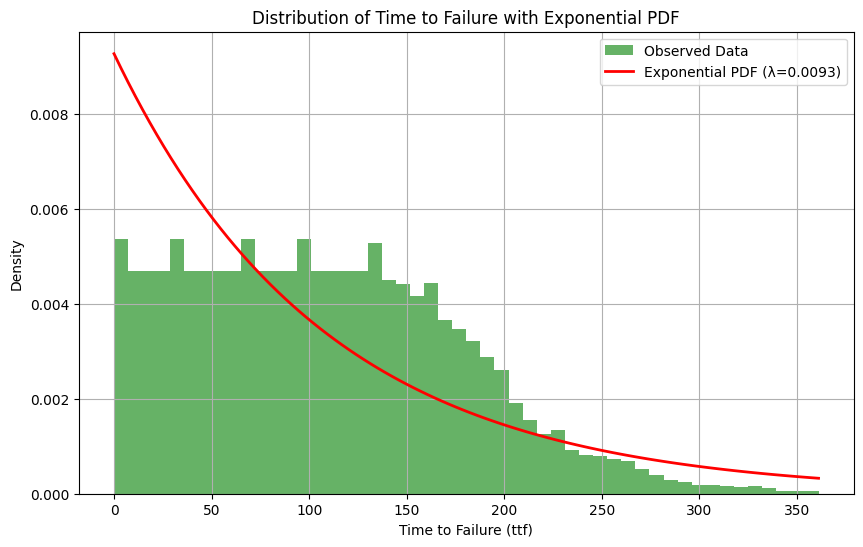

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Plot histogram of 'ttf' data
plt.figure(figsize=(10, 6))
plt.hist(df['ttf'], bins=50, density=True, alpha=0.6, color='g', label='Observed Data')

# Plot the exponential distribution PDF using the calculated mean as 1/lambda
# The scale parameter for expon.pdf is the mean (1/lambda)
x = np.linspace(0, df['ttf'].max(), 100)
pdf = expon.pdf(x, scale=ttf_mean)
plt.plot(x, pdf, 'r-', lw=2, label=f'Exponential PDF (λ={1/ttf_mean:.4f})')

plt.xlabel('Time to Failure (ttf)')
plt.ylabel('Density')
plt.title('Distribution of Time to Failure with Exponential PDF')
plt.legend()
plt.grid(True)
plt.show()

This roughly follows exponential distribution, we can see that the time to failure before next failure can be modeled in the graph

Basically the time before the next car stops is give in the graph

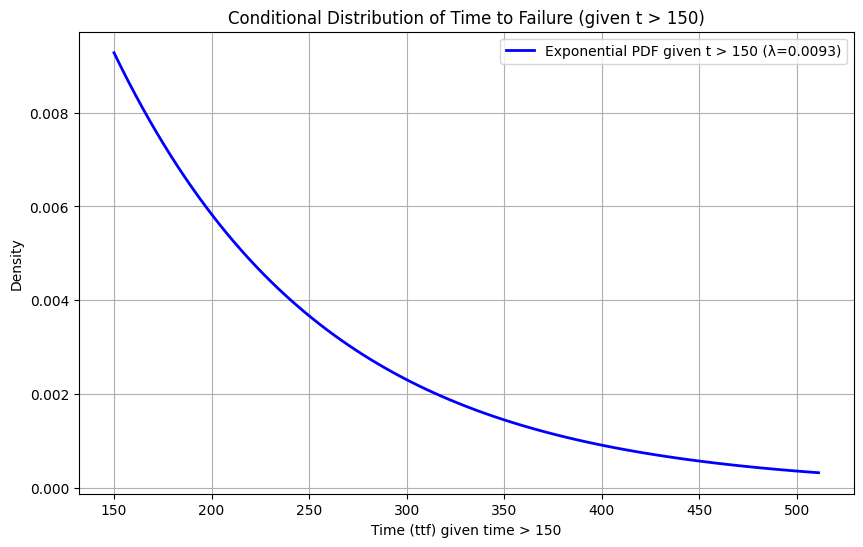

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Time already passed
time_passed = 150

# Plot the conditional exponential distribution PDF (shifted)
# The exponential distribution is memoryless, so the remaining time follows the same distribution
# We shift the distribution by the time already passed.
x_conditional = np.linspace(time_passed, df['ttf'].max() + time_passed, 100)
# The PDF of the exponential distribution is lambda * exp(-lambda * x).
# For the conditional distribution P(T > t0 + x | T > t0) = P(T > x) due to memorylessness.
# So the PDF of the remaining time X = T - t0 is the same as the original PDF, f(x) = lambda * exp(-lambda * x) for x >= 0.
# When plotting in terms of the absolute time scale (time_passed + x), the PDF is still f(time_passed + x) = lambda * exp(-lambda * (time_passed + x))? No, this is wrong.
# The density of T at time t given T > t0 is f(t | T > t0) = f(t) / P(T > t0) for t >= t0.
# f(t) = lambda * exp(-lambda * t)
# P(T > t0) = exp(-lambda * t0)
# f(t | T > t0) = (lambda * exp(-lambda * t)) / exp(-lambda * t0) = lambda * exp(-lambda * (t - t0)) for t >= t0.
# Let y = t - t0, then t = y + t0. The PDF in terms of y is lambda * exp(-lambda * y) for y >= 0, which is the original exponential PDF.
# So, the distribution of the *remaining* time (y) is the same as the original exponential distribution.
# To plot this on the *absolute* time scale (t), we plot lambda * exp(-lambda * (t - time_passed)) for t >= time_passed.

lambda_est = 1 / ttf_mean
pdf_conditional = lambda_est * np.exp(-lambda_est * (x_conditional - time_passed))

plt.figure(figsize=(10, 6))
plt.plot(x_conditional, pdf_conditional, 'b-', lw=2, label=f'Exponential PDF given t > {time_passed} (λ={lambda_est:.4f})')

plt.xlabel(f'Time (ttf) given time > {time_passed}')
plt.ylabel('Density')
plt.title(f'Conditional Distribution of Time to Failure (given t > {time_passed})')
plt.legend()
plt.grid(True)
plt.show()

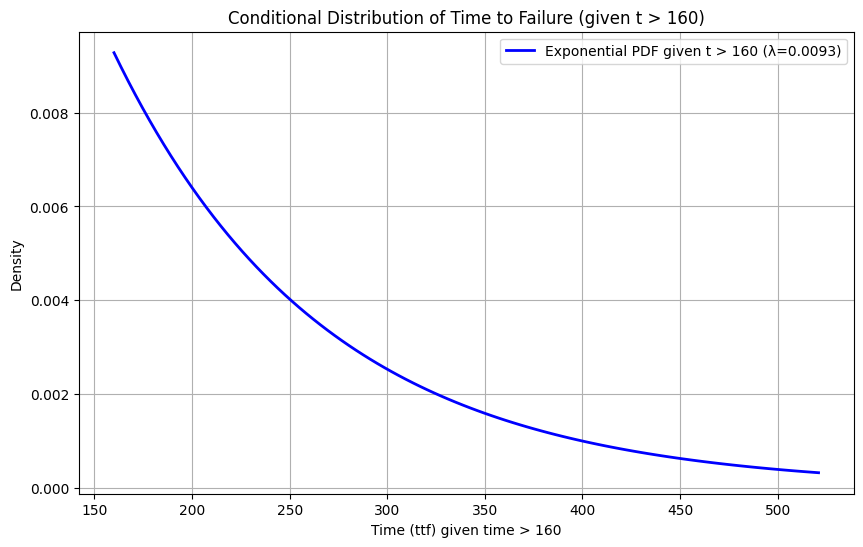

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Time already passed
time_passed = 160

# Plot the conditional exponential distribution PDF (shifted)
# The exponential distribution is memoryless, so the remaining time follows the same distribution
# We shift the distribution by the time already passed.
x_conditional = np.linspace(time_passed, df['ttf'].max() + time_passed, 100)
# The PDF of the exponential distribution is lambda * exp(-lambda * x).
# For the conditional distribution P(T > t0 + x | T > t0) = P(T > x) due to memorylessness.
# So the PDF of the remaining time X = T - t0 is the same as the original PDF, f(x) = lambda * exp(-lambda * x) for x >= 0.
# When plotting in terms of the absolute time scale (time_passed + x), the PDF is still f(time_passed + x) = lambda * exp(-lambda * (time_passed + x))? No, this is wrong.
# The density of T at time t given T > t0 is f(t | T > t0) = f(t) / P(T > t0) for t >= t0.
# f(t) = lambda * exp(-lambda * t)
# P(T > t0) = exp(-lambda * t0)
# f(t | T > t0) = (lambda * exp(-lambda * t)) / exp(-lambda * t0) = lambda * exp(-lambda * (t - t0)) for t >= t0.
# Let y = t - t0, then t = y + t0. The PDF in terms of y is lambda * exp(-lambda * y) for y >= 0, which is the original exponential PDF.
# So, the distribution of the *remaining* time (y) is the same as the original exponential distribution.
# To plot this on the *absolute* time scale (t), we plot lambda * exp(-lambda * (t - time_passed)) for t >= time_passed.

lambda_est = 1 / ttf_mean
pdf_conditional = lambda_est * np.exp(-lambda_est * (x_conditional - time_passed))

plt.figure(figsize=(10, 6))
plt.plot(x_conditional, pdf_conditional, 'b-', lw=2, label=f'Exponential PDF given t > {time_passed} (λ={lambda_est:.4f})')

plt.xlabel(f'Time (ttf) given time > {time_passed}')
plt.ylabel('Density')
plt.title(f'Conditional Distribution of Time to Failure (given t > {time_passed})')
plt.legend()
plt.grid(True)
plt.show()

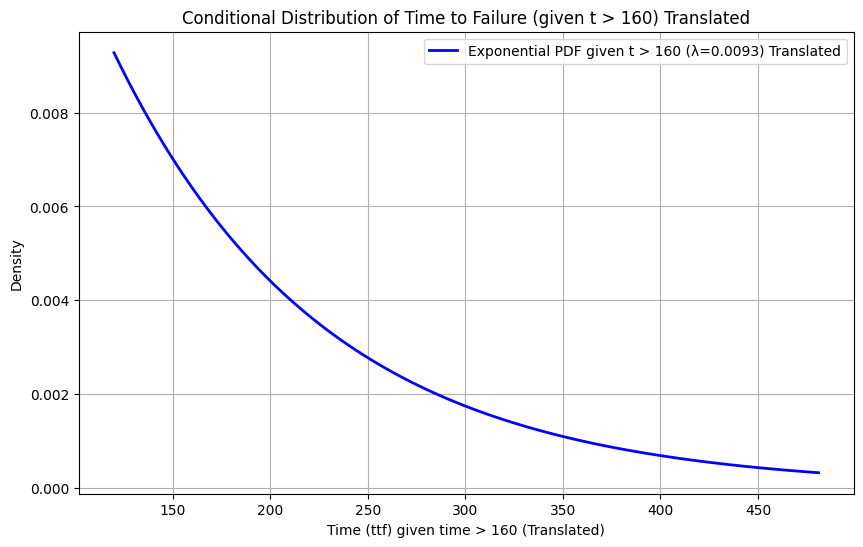

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Time already passed
time_passed = 160

# Calculate the conditional exponential distribution PDF (shifted)
# The exponential distribution is memoryless, so the remaining time follows the same distribution
lambda_est = 1 / ttf_mean
x_conditional = np.linspace(time_passed, df['ttf'].max() + time_passed, 100)
pdf_conditional = lambda_est * np.exp(-lambda_est * (x_conditional - time_passed))

# Translate the x-axis values by -40
x_conditional_translated = x_conditional - 40

# Plot the translated conditional exponential distribution PDF
plt.figure(figsize=(10, 6))
plt.plot(x_conditional_translated, pdf_conditional, 'b-', lw=2, label=f'Exponential PDF given t > {time_passed} (λ={lambda_est:.4f}) Translated')

plt.xlabel(f'Time (ttf) given time > {time_passed} (Translated)')
plt.ylabel('Density')
plt.title(f'Conditional Distribution of Time to Failure (given t > {time_passed}) Translated')
plt.legend()
plt.grid(True)
plt.show()

The above graphs show the memoryless property, given 150 seconds have already passed or even 160 seconds, the probability of engine stopping after 10 seconds is the same in both cases, as the curves are same

memoryless property of exponential distribution can also be understand as translating the graph to the lest side by n units, the new graph will resemble the old graph, hence all probabilities are same so memoryless property validated

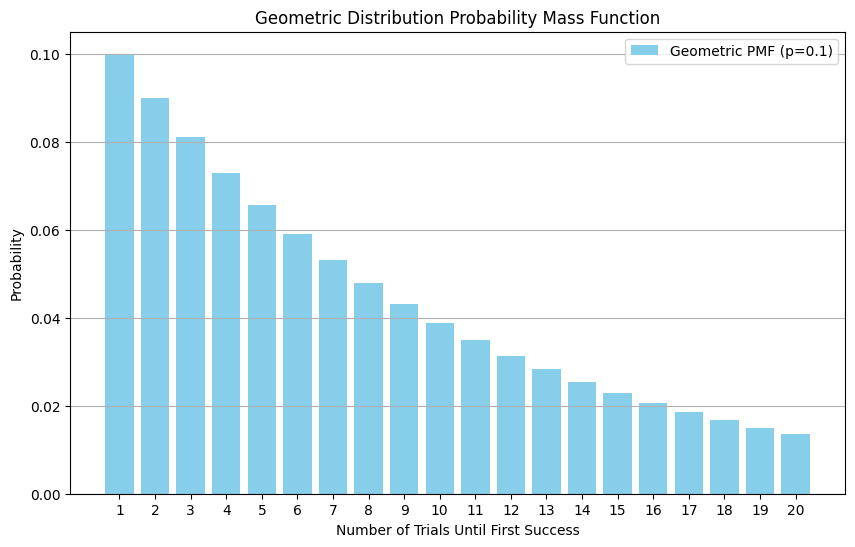

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import geom

# Probability of success in a single trial
# You can change this value
p = 0.1

# Define the range of possible outcomes (number of trials until first success)
# We'll plot for up to 20 trials for this example
x = np.arange(1, 21)

# Calculate the probability mass function (PMF) for each x
pmf = geom.pmf(x, p)

# Plot the geometric distribution PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', label=f'Geometric PMF (p={p})')

plt.xlabel('Number of Trials Until First Success')
plt.ylabel('Probability')
plt.title('Geometric Distribution Probability Mass Function')
plt.xticks(x)
plt.legend()
plt.grid(axis='y')
plt.show()

Exponential distribution is the continuous version o Geometric
if the data had discrete values, we could've modeled that in Geometric, but since it has time we did Exponential

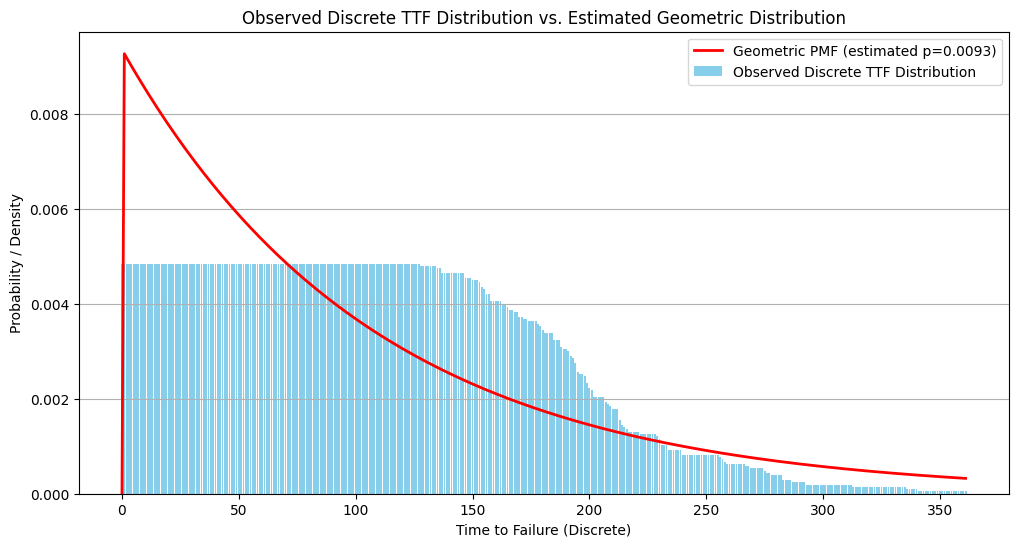

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import geom

# Treat 'ttf' as discrete values (integers)
# Estimate the probability of "success" (failure) at each time step
# We can approximate the probability of failure at a given time t as the proportion of units failing at time t
# divided by the number of units that survived up to time t-1.
# This is related to the discrete hazard function.

# Let's simplify and try to estimate a single 'p' for the geometric distribution.
# For a geometric distribution, the mean is 1/p. We can estimate p from the mean of the discrete 'ttf' values.
# However, the 'ttf' values are time *until* failure, not the number of trials until failure.
# A more appropriate way to relate this to a geometric distribution might be to think of discrete time steps.
# Let's consider the proportion of failures at the first time step (ttf=1) as an approximation for 'p'.
# This is a simplification and might not be the best statistical approach for this data.

# Let's instead calculate the frequency of each 'ttf' value and use that to visualize a discrete distribution.
# We can then compare this to a theoretical geometric distribution.

ttf_counts = df['ttf'].value_counts().sort_index()
ttf_values = ttf_counts.index
ttf_frequencies = ttf_counts.values
total_failures = ttf_frequencies.sum()
ttf_probabilities = ttf_frequencies / total_failures

# Now, let's try to fit a geometric distribution by estimating 'p' from the mean of the 'ttf' values.
# Mean of geometric distribution is 1/p. So, p_est = 1 / mean(ttf).
# This is a simplification as 'ttf' is time until failure, not number of trials.
# However, let's use this as an approximation for plotting.
p_est = 1 / df['ttf'].mean()

# Define the range for the geometric distribution PMF
# We'll use the unique ttf values from the data
x_geom = ttf_values

# Calculate the theoretical geometric distribution PMF
pmf_geom = geom.pmf(x_geom, p_est)

# Plot the observed discrete distribution and the theoretical geometric distribution
plt.figure(figsize=(12, 6))
plt.bar(ttf_values, ttf_probabilities, color='skyblue', label='Observed Discrete TTF Distribution')
plt.plot(x_geom, pmf_geom, 'r-', lw=2, label=f'Geometric PMF (estimated p={p_est:.4f})')

plt.xlabel('Time to Failure (Discrete)')
plt.ylabel('Probability / Density')
plt.title('Observed Discrete TTF Distribution vs. Estimated Geometric Distribution')
plt.legend()
plt.grid(axis='y')
plt.show()

It's important to note that this is an approximation for this dataset because 'ttf' represents continuous time to failure, while the geometric distribution is for discrete trials until success. We are essentially using the average time to failure from your data to estimate the probability of failure in a single discrete time step for the purpose of illustrating the geometric distribution

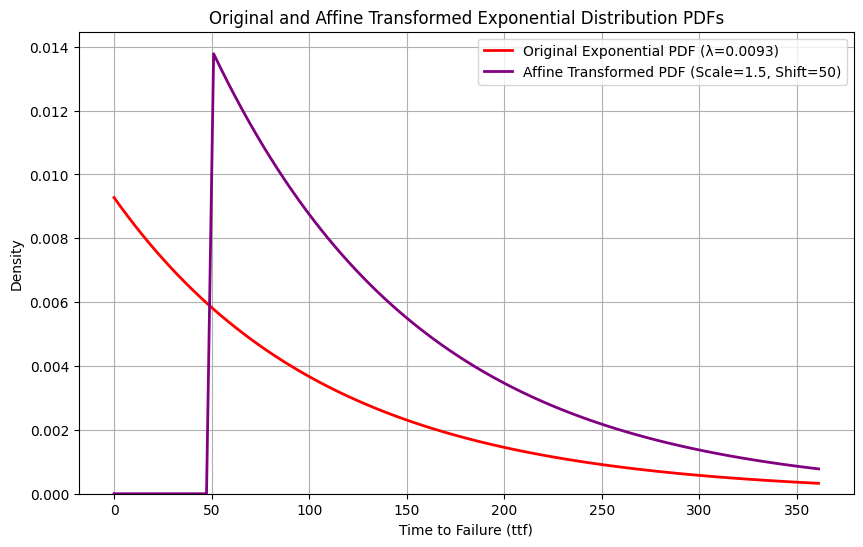

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Estimate lambda from the mean of 'ttf'
lambda_est = 1 / ttf_mean

# Define the range for plotting
x = np.linspace(0, df['ttf'].max(), 100)

# Calculate the original exponential distribution PDF
pdf_original = lambda_est * np.exp(-lambda_est * x)

# Define parameters for the affine transformation
# Scaling factor for density
scale_factor = 1.5
# Shift amount for the x-axis
shift_amount = 50

# Calculate the affine transformed PDF
# We are applying the transformation to the x-values and scaling the resulting PDF value
# A simple form of affine transformation on the variable could be f(x - shift_amount)
# And scaling the density by scale_factor
pdf_transformed = scale_factor * lambda_est * np.exp(-lambda_est * (x - shift_amount))

# Ensure transformed PDF is plotted only for values where x - shift_amount >= 0
pdf_transformed[x - shift_amount < 0] = 0


# Plot the original and affine transformed exponential distribution PDFs
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_original, 'r-', lw=2, label=f'Original Exponential PDF (λ={lambda_est:.4f})')
plt.plot(x, pdf_transformed, 'purple', lw=2, label=f'Affine Transformed PDF (Scale={scale_factor}, Shift={shift_amount})')

plt.xlabel('Time to Failure (ttf)')
plt.ylabel('Density')
plt.title('Original and Affine Transformed Exponential Distribution PDFs')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0) # Ensure y-axis starts at 0
plt.show()